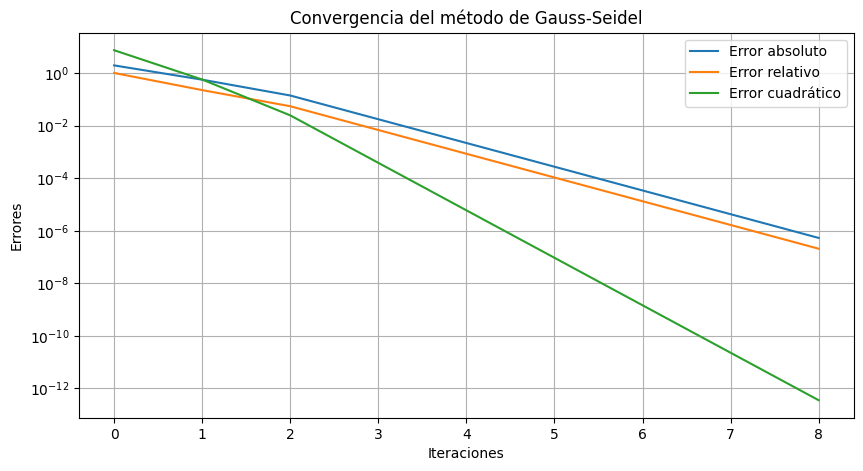

In [ ]:
#   Codigo que implementa el esquema numerico
#   del metodo iterativo de Gauss-Seidel para
#   resolver sistemas de ecuaciones
#
#           Autor:
#   kimberly milagros miranda rosel
#   kimberlymiranda080805@gmail.com
#   Version 1.0 : 12/03/2025
#
import numpy as np
import matplotlib.pyplot as plt
import csv

def gauss_seidel(A, b, tol=1e-6, max_iter=100):
    n = len(b)
    x = np.zeros(n)
    x_prev = np.copy(x)
    errors = []

    print("Iter |", " | ".join([f"x[{i}]" for i in range(n)]), "| Error absoluto | Error relativo | Error cuadrático")
    print("-" * 80)

    for k in range(max_iter):
        for i in range(n):
            sum1 = sum(A[i][j] * x[j] for j in range(i))
            sum2 = sum(A[i][j] * x_prev[j] for j in range(i + 1, n))
            x[i] = (b[i] - sum1 - sum2) / A[i][i]

        abs_error = np.linalg.norm(x - x_prev, ord=np.inf)
        rel_error = abs_error / (np.linalg.norm(x, ord=np.inf) + 1e-10)
        quad_error = np.linalg.norm(x - x_prev) ** 2

        errors.append((k + 1, abs_error, rel_error, quad_error))

        print(f"{k + 1:4d} |", " | ".join([f"{val:.6f}" for val in x]), f"| {abs_error:.2e} | {rel_error:.2e} | {quad_error:.2e}")

        if abs_error < tol:
            break

        x_prev = np.copy(x)

    return x, errors

A = np.array([
    [10, 2, 3, 1],
    [2, 12, 2, 3],
    [3, 2, 15, 1],
    [1, 3, 1, 10]
])

b = np.array([15, 22, 18, 10])

"""# Nueva matriz A y vector b para el sistema de ecuaciones con 5 incógnitas
A = np.array([
    [20, -5, -3, 0, 0],
    [-4, 18, -2, -1, 0],
    [-3, -1, 22, -5, 0],
    [0, -2, -4, 25, -1],
    [0, 0, 0, 0, 1]  # Agregamos la ecuación para T5 (que es solo T5 = 0, asumido como 0)
])

b = np.array([100, 120, 130, 150, 0])  # Valor de T5 asumido como 0"""

"""# Nueva matriz A y vector b para el sistema de ecuaciones con 10 incógnitas
A = np.array([
    [15, -4, -1, -2, 0, 0, 0, 0, 0, 0],
    [-3, 18, -2, 0, 0, 0, 0, 0, 0, 0],
    [-1, -2, 20, -5, 0, 0, 0, 0, 0, 0],
    [-2, -1, -4, 22, 0, 0, 0, 0, 0, 0],
    [0, -1, -3, -1, 25, -2, 0, 0, 0, 0],
    [0, 0, -2, 0, -1, 28, -1, 0, 0, 0],
    [0, 0, 0, -4, 0, -2, 30, -3, 0, 0],
    [0, 0, 0, 0, -1, 0, -1, 35, -2, 0],
    [0, 0, 0, 0, 0, -2, 0, -3, 40, -1],
    [0, 0, 0, 0, 0, 0, -3, 0, -1, 45]
])

b = np.array([200, 250, 180, 300, 270, 310, 320, 400, 450, 500])"""

x_sol, errors = gauss_seidel(A, b)

print("\nSolución aproximada:")
for i, val in enumerate(x_sol):
    print(f"x[{i}] = {val:.6f}")

with open("errors.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Iteración", "Error absoluto", "Error relativo", "Error cuadrático"])
    writer.writerows(errors)
    writer.writerow([])
    writer.writerow(["Solución aproximada"])
    for val in x_sol:
        writer.writerow([val])

iterations = [e[0] for e in errors]
abs_errors = [e[1] for e in errors]
rel_errors = [e[2] for e in errors]
quad_errors = [e[3] for e in errors]

plt.figure(figsize=(10, 5))
plt.plot(iterations, abs_errors, label="Error absoluto")
plt.plot(iterations, rel_errors, label="Error relativo")
plt.plot(iterations, quad_errors, label="Error cuadrático")
plt.yscale("log")
plt.xlabel("Iteraciones")
plt.ylabel("Errores")
plt.title("Convergencia del método de Gauss-Seidel")
plt.legend()
plt.grid()
plt.savefig("convergencia_gauss_seidel.png")
plt.show()